In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import stft
from scipy.signal import periodogram,firwin,lfilter

# Lab Topic 1

# 1. Generate signal
## Linear transient chirp signal
$s(t)=\begin{cases}0; t\notin[t_a,t_a+L]\\A\sin(2\pi(f_0(t-t_a)+f_1(t-t_a)^2)+\phi_0)\end{cases}$


Text(0, 0.5, 's(t)')

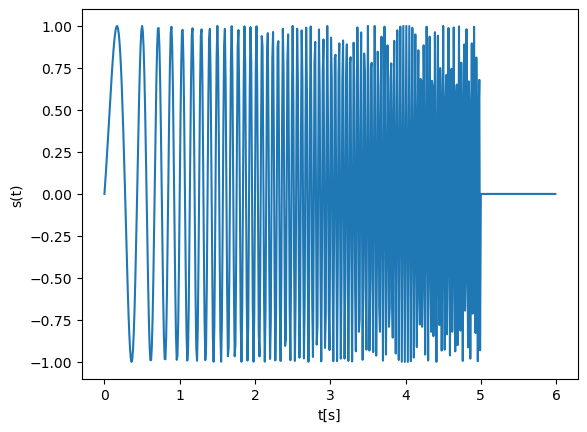

In [3]:
def s(t,A=1,ta=0,f0=1,f1=3,phi0=0,L=5):
    if ta<t<ta+L:
        return A*np.sin(2*np.pi*(f0*(t-ta)+f1*(t-ta)**2)+phi0)
    else:
        return 0

T=6  # signal duration time(s)
sample_freq=100 # sampling frequency delta_f > 2*max(fB)=62(HZ)
sample_interval=1/sample_freq  # sampling interval delta_t
N=int(T/sample_interval)  # number of sampling points

x=np.arange(0,T,sample_interval)
s_t=[s(t) for t in x]

plt.figure()
plt.plot(x,s_t)
plt.xlabel('t[s]')
plt.ylabel('s(t)')

# 2. Fourier transform


Text(0, 0.5, 'Magnitude')

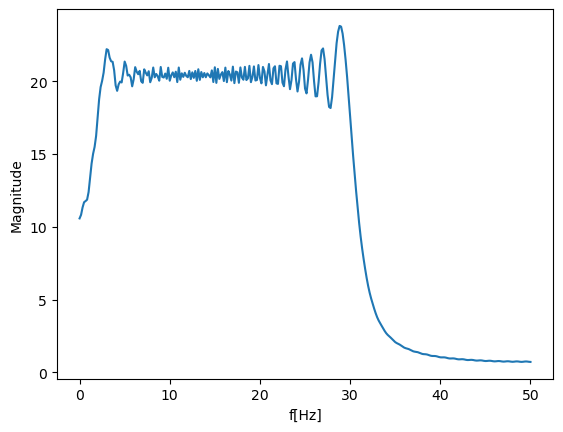

In [4]:
s_f=np.fft.rfft(s_t)  # FFT with only positive frequencies 
f=np.fft.rfftfreq(N,sample_interval)

plt.figure()
plt.plot(f,np.abs(s_f))
plt.xlabel('f[Hz]')
plt.ylabel('Magnitude')

# Advanced Lab Topic 1

# 1. Spectrogram

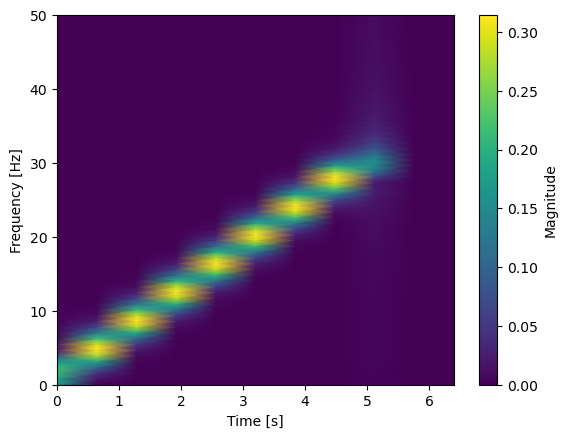

In [5]:
# STFT
f, t, Zxx = stft(s_t,fs=sample_freq,nperseg=128)

plt.figure()
plt.pcolormesh(t,f,np.abs(Zxx),shading='gouraud')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [s]')
plt.colorbar(label='Magnitude')

# 2. Filtering

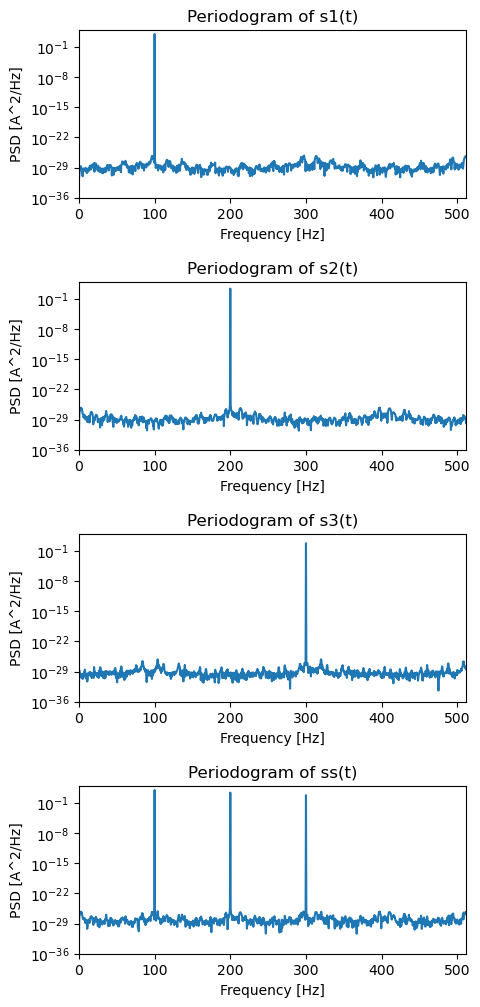

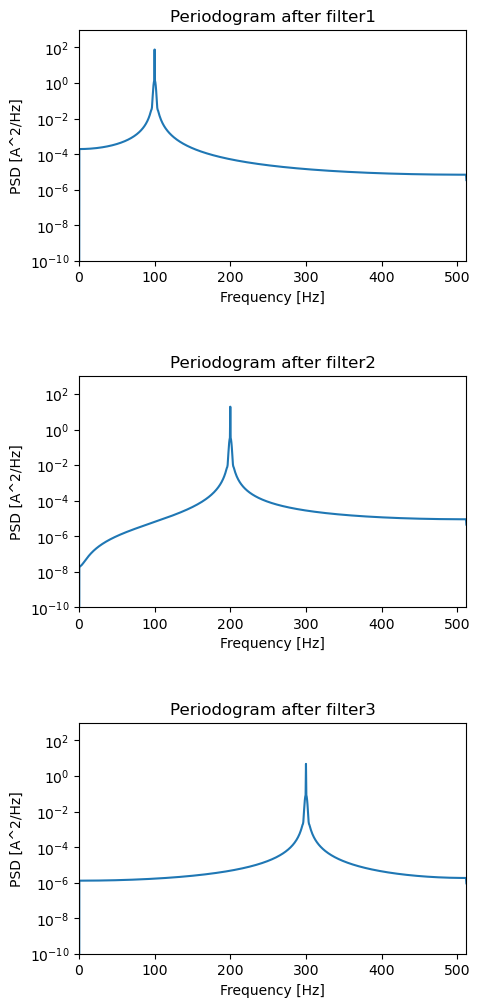

In [6]:
N=2048  # number of sampling points
sample_freq=1024  # sampling frequency delta_f(Hz)
sample_interval=1/sample_freq  # sampling interval delta_t
signal_len=N*sample_interval  # signal duration time(s) 

def ss(t):
    s1_t=10*np.sin(2*np.pi*100*t)
    s2_t=5*np.sin(2*np.pi*200*t+np.pi/6)
    s3_t=2.5*np.sin(2*np.pi*300*t+np.pi/4)
    ss_t=s1_t+s2_t+s3_t
    return s1_t,s2_t,s3_t,ss_t

x=np.arange(0,signal_len,sample_interval)

s_t=[]
titles = ['s1(t)','s2(t)','s3(t)','ss(t)']
plt.subplots(4,1,figsize=(5, 12))
plt.subplots_adjust(hspace=0.5)
for i in range(4):
    s_t_i=[ss(t)[i] for t in x]
    s_t.append(s_t_i)

    f_i,Pxx_i=periodogram(s_t_i,sample_freq)

    plt.subplot(4, 1, i+1)
    plt.semilogy(f_i, Pxx_i)
    plt.xlim(0,max(f_i))
    plt.ylim(1e-36, 1e3)
    plt.title(f'Periodogram of {titles[i]}')
    plt.xlabel('Frequency [Hz]')
    plt.ylabel('PSD [A^2/Hz]')

numtaps=500
bands=[(98, 102),(198, 202),(298, 302)] 
plt.subplots(3,1,figsize=(5,12))
plt.subplots_adjust(hspace=0.5)
for i in range(3):
    band=[b/(0.5*sample_freq) for b in bands[i]]
    fir_coeff = firwin(numtaps,band,pass_zero=False)
    filtered_s_t_i = lfilter(fir_coeff,1.0,s_t[i])

    f_i, Pxx_i = periodogram(filtered_s_t_i, sample_freq)
    plt.subplot(3, 1, i+1)
    plt.semilogy(f_i, Pxx_i)
    plt.xlim(0,max(f_i))
    plt.ylim(1e-10, 1e3)
    plt.title(f'Periodogram after filter'+str(i+1))
    plt.xlabel('Frequency [Hz]')
    plt.ylabel('PSD [A^2/Hz]')


